## Assignment1 Car Price Prediction


Chaky's Company would like to predict the car price for cars that will be made in the future. As an data scientist, I was assigned to implemented web-based car price prediction system. According to the information, this problem is cinsidered as a regression problem since I would like to predict selling price which is continuouse values.
<br></br>
The followings describe the features.
- name: brand of cars
- year
- selling price: in Baht
- km driven: kilometers of a car that have driven
- fuel: Diesel and Petrol
- transmission
- owner
- mileage
-engine
- max power
- torque
- seats

In [7]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

## load data

In [8]:
df = pd.read_csv("Cars.csv")

In [9]:
#show the table
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [10]:
# Check the shape of your data
df.shape

(8128, 13)

It means this table consist of 8128 samples, and 12 features

In [11]:
# Statistical info Hint: look up .describe()
df.describe()


,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [12]:
# Check Dtypes of your input data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Many features are needed to change data type from object to numerical types so that I will be able to use features to predict selling price. 

In [13]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## Exploratory Data Analysis

I rearranged data according to requiements of Chaky's Company

-univariate analysis
-multivariate analysis
(later)

In [14]:
#check data in the feature owner
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [15]:
#For the feature owner, map First Owner to 1, ..., Test Drive Car to 5

# Using Dictionary for mapping
dict_map = {'First Owner': 1,
    'Second Owner': 2, 'Third Owner' :3, 'Fourth & Above Owner' :4, 'Test Drive Car':5}
updateOwner = df['owner'].map(dict_map)
df['owner'] = updateOwner

In [16]:
#For the feature fuel, remove all rows with CNG and LPG
df = df[df["fuel"].str.contains("CNG|LPG") == False]

In [17]:
#For the featurre mileage, remove "kmpl" and convert the column to float
df['mileage'] = df['mileage'].str.replace('kmpl', '').astype(float)

In [18]:
#For the feature engine, remove "CC" and convert the column to float
df['engine'] = df['engine'].str.replace('CC', '').astype(float)

In [19]:
#For the feature max power, remove "bhp" and convert the column to float
df['max_power'] = df['max_power'].str.replace('bhp', '').astype(float)

In [20]:
#For the feature brand, take only the first word and remove the rest

updateBrand = df['name'].str.split().str.get(0)
df['name'] = updateBrand

In [21]:
#Drop the feature torque since Chaky's company does not understand the kind of information
df =df.drop(columns=["torque"])

In [22]:
#Delete all sample related to Test Drive Cars because they are too expensive so that Chaky's company doesn't interested
df = df.loc[df["owner"] != 5 ]

In [23]:
#list unique values in the column fuel, and the data contains of 2 types of fuel which are Dissel and Petrol
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

Next, I will convert categorical type of features in to numerical so that I can develop prdict system using these features.

In [24]:
#use label encoding to covert fuel types to numbers
le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])
df['fuel'] = le.fit_transform(df['fuel'])


In [25]:
#list unique values in the column seller_type, and the data contains of 3 types of sellers which are Individual, Dealer, and Trutmark Dealer
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [26]:
#use label encoding to covert seller types to numbers
df['seller_type'] = le.fit_transform(df['seller_type'])
df['seller_type'] = le.fit_transform(df['seller_type'])


In [27]:
#list unique values in the column transmission, and the data contains of 2 types of transmission which are Munual, and Automatic
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [28]:
#use label encoding to covert transmission categories to numbers
df['transmission'] = le.fit_transform(df['transmission'])
df['transmission'] = le.fit_transform(df['transmission'])

In [29]:
#use label encoding to covert brands to numbers
df['name'] = le.fit_transform(df['name'])
df['name'] = le.fit_transform(df['name'])

In [30]:
#transform selling price using log transform because big number can cause prediction to be unstable
df['selling_price'] = np.log(df["selling_price"])

In [31]:
#After adjust the data follow the requirements, show the adjusted data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,13.017003,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,27,2014,12.821258,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,10,2006,11.970350,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,11,2010,12.323856,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,20,2007,11.775290,120000,1,1,1,1,16.10,1298.0,88.20,5.0


## Correlation Matrix

I used correlation matrix in order to find the correlated features.

<Axes: >

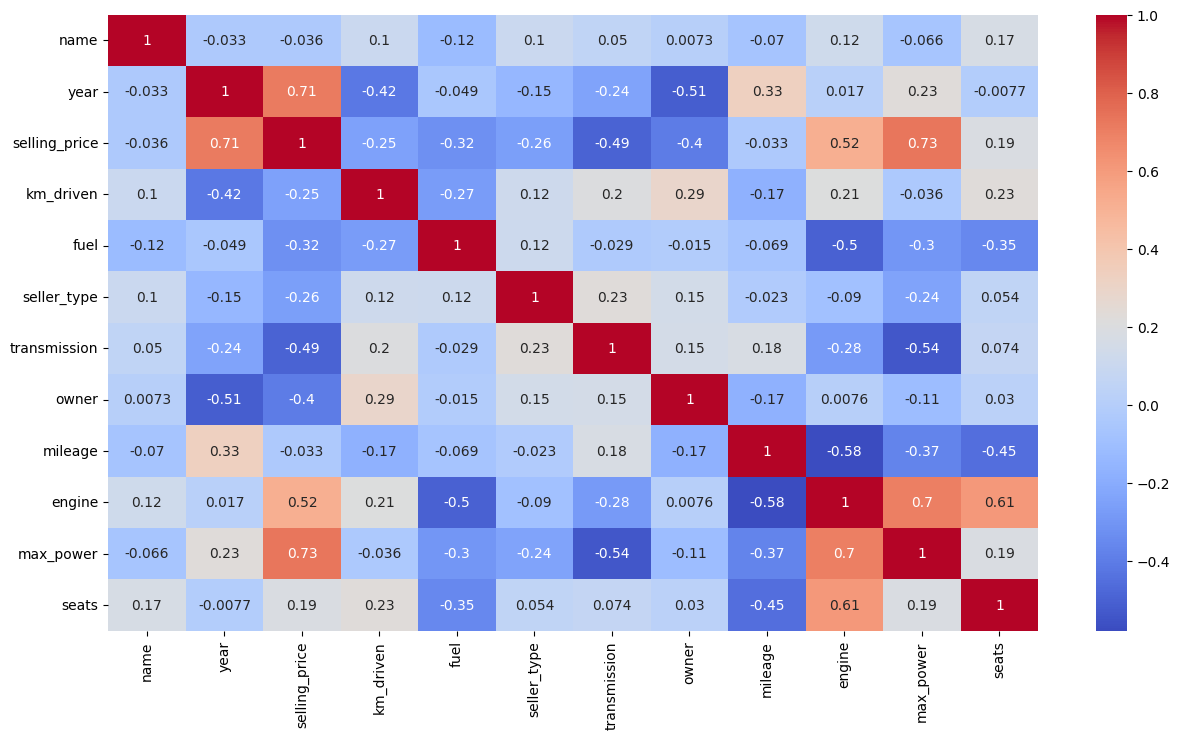

In [32]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  

According to the correlation matrix, there are 2 pair of features that are too correlate as follows;
1. engine and max_power
2. engine and seats

Therefore, I decided to not using these pairs together.


## Predictive Power Score

I used pps in order tp help me to find the appropriate features for predict selling price

<Axes: xlabel='x', ylabel='y'>

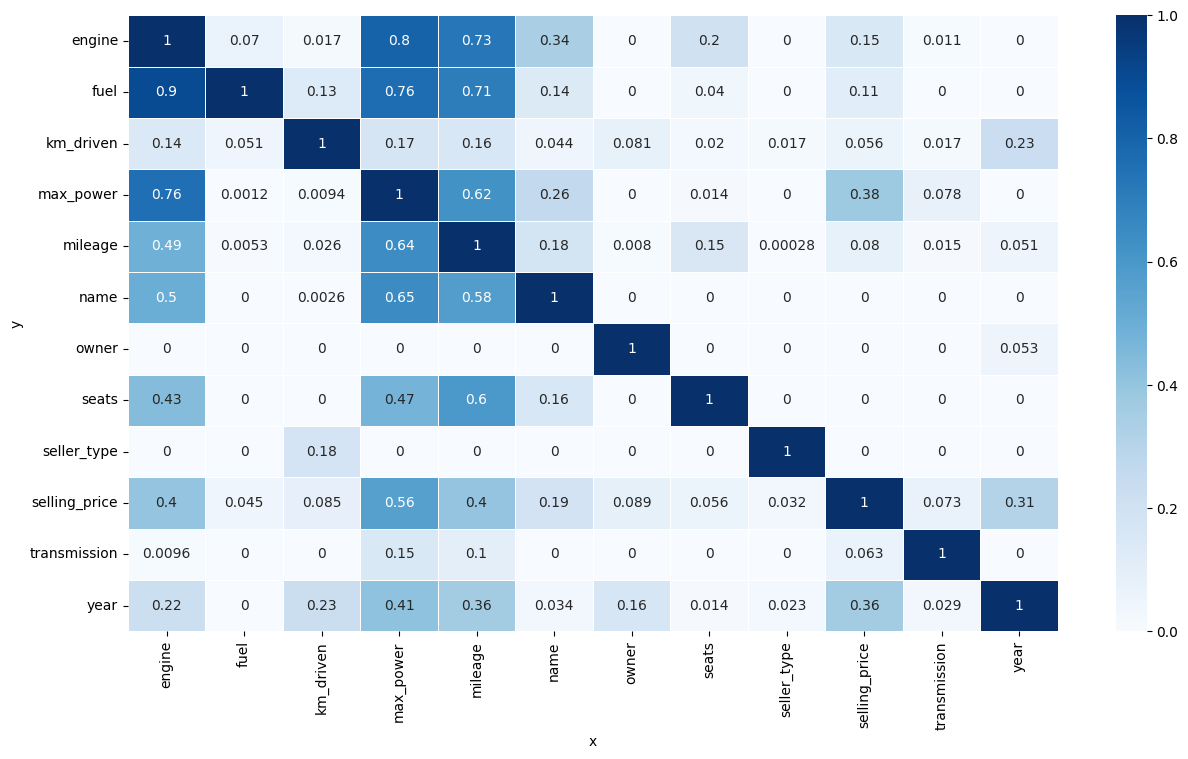

In [33]:
import ppscore as pps

matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

The high values of pps means the feature x is significant to predict variable y. In this case, I would like to find important features to predict selling price so I can list pps score related to selling_price column descending as follows;
1.max_power
2.engine
3.mileage
4.year
5.Name
6.owner
7.km_driven
8.transmission
9.seats 
10.fuel 
11.seller type 
From the rank, I can conclude that max_power is the most significant feature to predict selling price and so on.

##  Feature selection

For feature selection, I choose max_power because the highest pps score, and I don't choose engine because engine trend is too correlated to max power.
<br>I choose mileage as a strong feature because it has high pps score after engine.</br>
<br>I choose year as a strong feature because it has high pps score after mileeage, and trend of selling price is increase every year so I think this feature will help to tell how much selling price should increase for every next year.</br>
<br>I don't choose brand feature because Chaky company make new cars so the brand is not the good criteria to predict car price for difference brand. (The company need to research more about material, technical spec in order to understand more about this feature).</br>
<br>I don't select owner as a strong feature because Chaky company make new cars. Therefore, we mainly focus on first hand type only.</br>
<br>Moreover, I don't select km_driven as a strong feature because Chaky company make new cars. Therefore, mostly of cars have 0 km driven.</br>
<br>Transmission, seats, fuel, and seller type are seem to be goood criteria to estimate selling price, but I don't select these features because pps score of these features are much different from year feature. And I did experiment before and it found that 3 strong features(max_power, mileage, year) barely different from 4 strong features (max_power, mileage, year, transmission). </br>
<br>To conclude, I selected max_power, mileage, and year as strong features.</br>

### Train test split

In [34]:
#x is our strong features
X = df[['max_power', 'mileage',  'year']]

#y is selling price column which I would like to predict
y = df["selling_price"]

In [35]:
#split data into train and test set with ratio 70:30, and choose random state = 42
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Preprocessing

### Null values

In [36]:
#check for null values for X_trrain
X_train[['max_power', 'mileage',  'year']].isna().sum()

max_power    149
mileage      154
year           0
dtype: int64

In [37]:
#check for null values for X_test
X_test[['max_power', 'mileage',  'year']].isna().sum()

max_power    59
mileage      60
year          0
dtype: int64

In [38]:
#check for null values for y_train
y_train.isna().sum()

0

In [39]:
#check for null values for y_test
y_test.isna().sum()

0

To conclude, this data has missing information on amx_power and mileage so I have to find which imputation method I should replace null values.

<Axes: xlabel='max_power'>

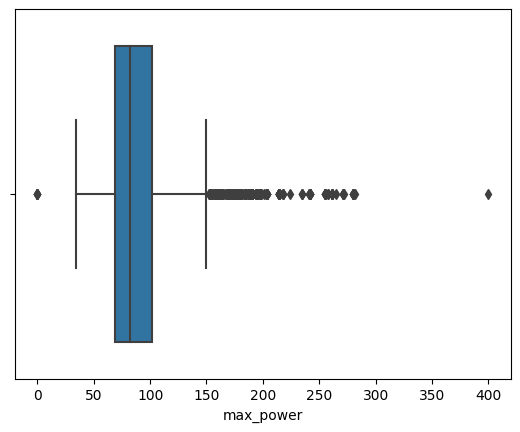

In [40]:
#use boxplot to see distribution of max power values
sns.boxplot(data=df, x='max_power')

It seems like there are many outliers. Therefore, mean is not a good way to replace null values so that I replace them with median instead

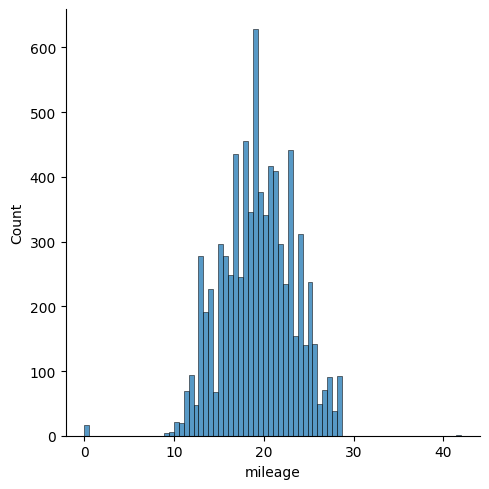

In [41]:
#use distribution plot to see data distribution of mileage
sns.displot(data=df, x= 'mileage')

The data look like a normal distribution. Therefore, mean is a good way to replace null values.

In [42]:
#fill the training set 

X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)


In [43]:
#fill the testing set with the training distribution 

X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [44]:
#same for y
y_train.fillna(y_train.median(), inplace=True)
y_test.fillna(y_train.mean(), inplace=True)

In [45]:
#check null values to make sure that there is no null values left
X_train[['max_power', 'mileage', 'year']].isna().sum()

max_power    0
mileage      0
year         0
dtype: int64

In [46]:
X_test[['max_power', 'mileage',  'year']].isna().sum()

max_power    0
mileage      0
year         0
dtype: int64

In [47]:
y_train.isna().sum(), y_test.isna().sum()

(0, 0)

In [48]:
#On website, if user doesn't have knowledge about max_power, I will fill median as default
df['max_power'].median()

82.4

In [49]:
#On website, if user doesn't have knowledge about mileage, I will fill mean as default
df['mileage'].mean()

19.391961863322244

### Checking Outliers

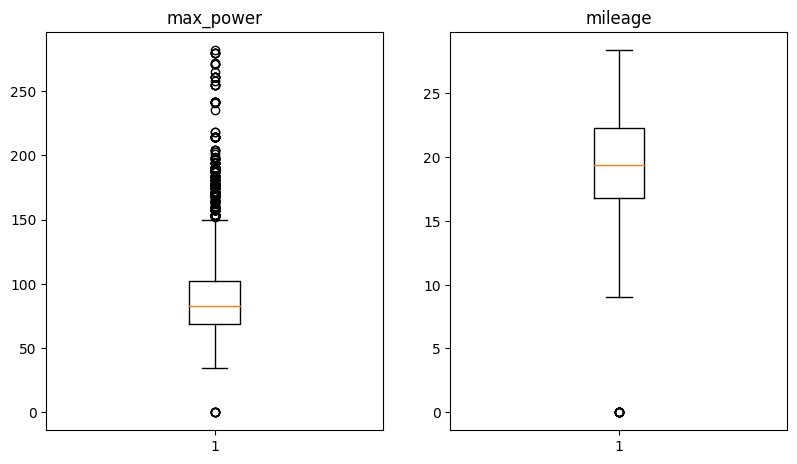

In [50]:
# Create a dictionary of columns.
col_dict = {'max_power':1, 'mileage':2, }

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [51]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [52]:
for col in X_train.iloc[:,[0,1]].columns:
    outlier_count(col)



---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%

---------------mileage---------------

Number of outliers: 14
Percent of data that is outlier: 0.25%


In [53]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [54]:
dfjg

NameError: name 'dfjg' is not defined

## Modeling



In [ ]:
#calculate mean square error and r^2
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.11370130089124604
r2:  0.8383976294188933


### Cross validation + Grid search

In [ ]:
# Libraries for model evaluation
from sklearn.linear_model import LinearRegression  
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [ ]:
#to find which linear regression algorithms is the best for the project
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.11822598 -0.10378219 -0.1258208  -0.11057062 -0.13218471]; Mean: -0.11811685708518453


SVR - Score: [-0.08456526 -0.08083364 -0.09695773 -0.08563933 -0.08863993]; Mean: -0.08732718126886792
KNeighbors Regressor - Score: [-0.06902424 -0.06823061 -0.07815842 -0.07147628 -0.06925188]; Mean: -0.07122828699043977
Decision-Tree Regressor - Score: [-0.06239011 -0.07472102 -0.066477   -0.07579072 -0.07228993]; Mean: -0.07033375839427387
Random-Forest Regressor - Score: [-0.05288296 -0.05696909 -0.06000353 -0.05926675 -0.05109571]; Mean: -0.0560436071718024


Random Forest is the best algorithm for this project.

### Grid Search

In [ ]:
#use grid search to find best performance of the model
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);

In [ ]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 15}

In [ ]:
# Find your grid_search's best score
best_mse = grid.best_score_

In [ ]:
best_mse  # ignore the minus because it's neg_mean_squared_error

-0.05692937921692883

## Testing



After I obtain the best model, I test performance of the model with test dataset.

In [ ]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

0.053299896795658976

## Analysis:  Feature Importance


#### Algorithm way

In [ ]:
#stored best model in this variable
rf = grid.best_estimator_

rf.feature_importances_

array([0.46880508, 0.05824726, 0.47294766])

Text(0.5, 0, 'Random Forest Feature Importance')

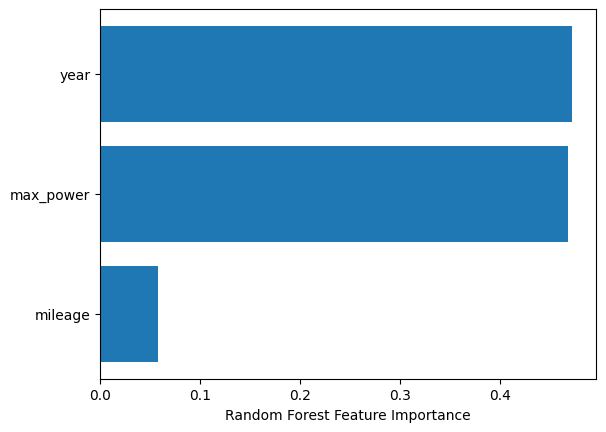

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### Permutation way

Text(0.5, 0, 'Random Forest Feature Importance')

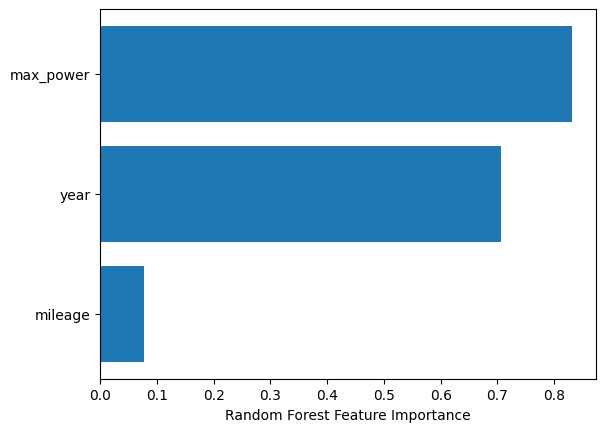

In [ ]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Inference

In [55]:
import pickle
from sklearn.preprocessing import StandardScaler
# save the model to disk
filename = 'carprice_predict2.model'
# pickle.dump(grid, open(filename, 'wb'))

In [56]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
#let's try to create one silly example
df[['max_power', 'mileage',  'year', 'selling_price']].loc[1]

max_power         103.520000
mileage            21.140000
year             2014.000000
selling_price      12.821258
Name: 1, dtype: float64

In [ ]:
[max_power, mileage, year]  = scaler.transform([[103.52,2014,12.821258]])[0]

In [ ]:
sample = [[max_power, mileage, year]]

In [ ]:
predicted = loaded_model.predict(sample)
pred_y = (predicted) 
pred_y

array([12.13152161])

## Summary

In this project, I selected 3 strong features which are max_power, mileage, and year. Max power is a crucial feature since it has high pps score, and feature important analysis also tell that max power is important in order to predict car price. On business perspective, it obvious that max power tell the performance of the car, the car always has high values if the max power is high. Another important feature is year since year also has high pps score. Moreover, year get the highest values of feature importance using shap way. In real life, car price is more expensive every year due to many factors such as economics. Therefore, year is a significant feature that help to predict how much car price will be increased so the feature made the an efficient model. On the other hand, mileage is not an important feature even it received the high pps score. In feature important analysis part, it shows that mileage is not crucial to this system.
<br></br>
The best algorithm for car price predict system is Random Forest Regression because it has the least mean squre error. Random Forest Regression is a simple algorithm that give high accuracy for continuous values or categorical values, many companies used this algorithm to predict prices. KNeighbors and decision tree are also considered as good algorithms for this project since they give not too high mean square error values. KNeighbors is appropriate for small dataset with label, and decision tree is work well for small tabular data but decision tree perform better when predict categorical value. So these algorithms are good but not good as random forest regression. Linear regression did not perform well since it goods to find relationship between two variables. SVR is also not appropriate to this project since it is more better with nonstationary variables.